# Genre Filtering

This notebook consolidates and cleans genre labels from two sources, removes near-duplicate genres based on co-occurrence overlap, and filters out free-to-play games incorrectly priced at zero.

In [18]:
import pandas as pd
df = pd.read_csv('../datasets/more_dropped_columns.csv')
print(df.shape[0])
df.head()

1779


,name,r-date,score,user score,genre,critics,users,price,dlc_count,achievements,genres,estimated_owners,average_playtime_forever,average_playtime_2weeks,total_steam_reviews,percent_positive_steam
0,Half-Life 2,"November 16, 2004",96,9.1,"Action,Shooter,Shooter,First-Person,Sci-Fi,Sci...",81,10773,9.99,1,33,['Action'],10000000 - 20000000,606,185,146055,0.974756
1,Grand Theft Auto V,"April 13, 2015",96,7.8,"Modern,Action Adventure,Open-World",57,6661,0.00,1,77,"['Action', 'Adventure']",20000000 - 50000000,13650,656,1381351,0.847863
2,Half-Life,"November 19, 1998",96,9.0,"Action,Shooter,Shooter,First-Person,Sci-Fi,Sci...",24,4321,9.99,1,0,['Action'],5000000 - 10000000,459,102,75965,0.965524
3,Portal 2,"April 18, 2011",95,9.1,"Action,Shooter,Shooter,First-Person,Sci-Fi,Sci...",52,7482,9.99,1,51,"['Action', 'Adventure']",10000000 - 20000000,874,118,301938,0.987951
4,The Elder Scrolls V: Skyrim,"November 10, 2011",94,8.3,"Role-Playing,First-Person,First-Person,Western...",32,11301,19.99,1,75,['RPG'],5000000 - 10000000,6458,596,309973,0.948270


## Cleaning Genre Columns

Both `genre` and `genres` columns contain duplicates and are differently formatted due to their differing initial source. Brackets and quotes are stripped, and duplicates within each entry are removed while preserving order.

In [19]:
df['genres'] = df['genres'].str.replace(r"[\[\]']", "", regex=True)
df['genres'] = df['genres'].apply(lambda x: ','.join(sorted(set(x.split(',')), key=x.split(',').index)).replace(', ', ','))
df['genre'] = df['genre'].apply(lambda x: ','.join(sorted(set(x.split(',')), key=x.split(',').index)))
df.head()

,name,r-date,score,user score,genre,critics,users,price,dlc_count,achievements,genres,estimated_owners,average_playtime_forever,average_playtime_2weeks,total_steam_reviews,percent_positive_steam
0,Half-Life 2,"November 16, 2004",96,9.1,"Action,Shooter,First-Person,Sci-Fi,Arcade",81,10773,9.99,1,33,Action,10000000 - 20000000,606,185,146055,0.974756
1,Grand Theft Auto V,"April 13, 2015",96,7.8,"Modern,Action Adventure,Open-World",57,6661,0.00,1,77,"Action,Adventure",20000000 - 50000000,13650,656,1381351,0.847863
2,Half-Life,"November 19, 1998",96,9.0,"Action,Shooter,First-Person,Sci-Fi,Arcade",24,4321,9.99,1,0,Action,5000000 - 10000000,459,102,75965,0.965524
3,Portal 2,"April 18, 2011",95,9.1,"Action,Shooter,First-Person,Sci-Fi,Arcade",52,7482,9.99,1,51,"Action,Adventure",10000000 - 20000000,874,118,301938,0.987951
4,The Elder Scrolls V: Skyrim,"November 10, 2011",94,8.3,"Role-Playing,First-Person,Western-Style",32,11301,19.99,1,75,RPG,5000000 - 10000000,6458,596,309973,0.948270


### Combining Genre Columns

The two genre columns are merged into a single `Combined_Genres` column, with duplicates across both sources removed.

In [20]:
def combine_genres(row):
    # Split each genre string into a list
    genres1 = row['genre'].split(',')
    genres2 = row['genres'].split(',')
    
    # Combine both lists and remove duplicates by converting to a set
    combined_genres = list(set(genres1 + genres2))
    
    # Join the combined list back into a string, with commas separating the genres
    return ','.join(combined_genres)

df['Combined_Genres'] = df.apply(combine_genres, axis=1)

### Tidying Combined Genres

Duplicates are removed again after combining, and the placeholder label `'General'` is dropped as it carries no useful information.

In [21]:
df['Combined_Genres'] = df['Combined_Genres'].apply(lambda x: ','.join(sorted(set(x.split(',')), key=x.split(',').index)))
df['Combined_Genres'] = df['Combined_Genres'].apply(lambda x: ','.join([genre for genre in x.split(',') if genre != 'General']))
df.head()

,name,r-date,score,user score,genre,critics,users,price,dlc_count,achievements,genres,estimated_owners,average_playtime_forever,average_playtime_2weeks,total_steam_reviews,percent_positive_steam,Combined_Genres
0,Half-Life 2,"November 16, 2004",96,9.1,"Action,Shooter,First-Person,Sci-Fi,Arcade",81,10773,9.99,1,33,Action,10000000 - 20000000,606,185,146055,0.974756,"Action,Shooter,Arcade,Sci-Fi,First-Person"
1,Grand Theft Auto V,"April 13, 2015",96,7.8,"Modern,Action Adventure,Open-World",57,6661,0.00,1,77,"Action,Adventure",20000000 - 50000000,13650,656,1381351,0.847863,"Action,Open-World,Modern,Action Adventure,Adve..."
2,Half-Life,"November 19, 1998",96,9.0,"Action,Shooter,First-Person,Sci-Fi,Arcade",24,4321,9.99,1,0,Action,5000000 - 10000000,459,102,75965,0.965524,"Action,Shooter,Arcade,Sci-Fi,First-Person"
3,Portal 2,"April 18, 2011",95,9.1,"Action,Shooter,First-Person,Sci-Fi,Arcade",52,7482,9.99,1,51,"Action,Adventure",10000000 - 20000000,874,118,301938,0.987951,"Action,Shooter,Arcade,Sci-Fi,First-Person,Adve..."
4,The Elder Scrolls V: Skyrim,"November 10, 2011",94,8.3,"Role-Playing,First-Person,Western-Style",32,11301,19.99,1,75,RPG,5000000 - 10000000,6458,596,309973,0.948270,"First-Person,RPG,Role-Playing,Western-Style"


## Removing Incorrectly Priced Games

Games with a price of 0 that are not labelled as Free to Play are likely data errors and are removed.

In [22]:
print(df.shape[0])
df = df[~((df['price'] == 0) & ~df['Combined_Genres'].str.contains('Free to Play', case=False))]
print(df.shape[0])

1779
1716


In [23]:
# df_free_to_play = df[df['Combined_Genres'].str.contains('Free to Play', case=False)]
# df_free_to_play.head()

## Genre Frequency

All genre labels are unpacked and counted across the dataset to understand how frequently each genre appears.

In [24]:
from collections import Counter
all_genres = [genre for sublist in df['Combined_Genres'].apply(lambda x: x.split(',')) for genre in sublist]

genre_counts = Counter(all_genres)

print(genre_counts['Action'])

print(genre_counts)

922
Counter({'Indie': 954, 'Action': 922, 'Adventure': 767, 'Strategy': 494, 'RPG': 372, 'Simulation': 268, 'Action Adventure': 258, 'Shooter': 232, 'First-Person': 230, 'Role-Playing': 195, 'Arcade': 186, 'Casual': 183, 'Real-Time': 177, 'Sci-Fi': 161, '2D': 140, 'Platformer': 138, '3D': 116, 'Turn-Based': 111, 'Fantasy': 102, 'Modern': 91, 'Third-Person': 89, 'Action RPG': 87, 'Miscellaneous': 85, 'Historic': 77, 'Point-and-Click': 75, 'Survival': 72, 'Puzzle': 72, 'Tactics': 67, 'Racing': 50, 'Tactical': 45, 'Sports': 44, 'Western-Style': 41, 'Open-World': 41, 'Combat': 40, 'Free to Play': 39, 'Management': 38, 'Horror': 37, "Shoot-'Em-Up": 35, 'Automobile': 33, 'Massively Multiplayer': 32, 'Linear': 30, 'Command': 27, 'Top-Down': 26, 'Driving': 23, 'Business / Tycoon': 23, 'Virtual': 21, "Beat-'Em-Up": 20, '4X': 18, 'Visual Novel': 18, 'Flight': 18, 'Japanese-Style': 16, 'Massively Multiplayer Online': 16, 'PC-style RPG': 16, 'Military': 16, 'Government': 16, 'Career': 15, 'Defense

### Filtering Rare Genres

Genres appearing fewer than 100 times are excluded. This avoids sparse genre columns that would add noise without enough representation to be meaningful.

In [25]:
from itertools import combinations

min_count = 100  # Minimum threshold for genres to be considered
valid_genres = [genre for genre, count in genre_counts.items() if count >= min_count]

print(f"Genres with at least {min_count} occurrences:", valid_genres)

Genres with at least 100 occurrences: ['Action', 'Shooter', 'Arcade', 'Sci-Fi', 'First-Person', 'Adventure', 'RPG', 'Role-Playing', 'Strategy', 'Real-Time', 'Action Adventure', 'Indie', 'Fantasy', 'Simulation', '2D', 'Platformer', 'Casual', 'Turn-Based', '3D']


In [26]:
def filter_invalid_genres(entry, valid_genres):
    # Split the entry into genres, keep only valid ones, and join them back into a string
    return ','.join([genre for genre in entry.split(',') if genre in valid_genres])

df_valid = df.copy()
df_valid['Combined_Genres'] = df['Combined_Genres'].apply(lambda x: filter_invalid_genres(x, valid_genres))
#print(df_valid.shape[0], df.shape[0])

## Genre Overlap Analysis

For each pair of valid genres, an overlap score is calculated as the proportion of the smaller genre's games that also carry the larger genre label. This captures how redundant two genres are relative to each other, and is stored in a symmetric overlap matrix.

In [27]:
genre_pairs = []
for genres in df_valid['Combined_Genres'].apply(lambda x: x.split(',')):
    # Only consider pairs where both genres are in the valid genres list
    valid_genre_pairs = [genre for genre in genres if genre in valid_genres]
    genre_pairs.extend(combinations(set(valid_genre_pairs), 2))  # Using set to avoid duplicates in one entry

pair_counts = Counter(genre_pairs)

overlap_matrix = pd.DataFrame(0.0, index=valid_genres, columns=valid_genres)

for (genre1, genre2), count in pair_counts.items():
    overlap = count / min(genre_counts[genre1], genre_counts[genre2])
    overlap_matrix.loc[genre1, genre2] = float(overlap)
    overlap_matrix.loc[genre2, genre1] = float(overlap)

overlap_matrix = overlap_matrix.astype(float)
#print("Overlap matrix (percentage of co-occurrence relative to genre frequencies):")
#print(overlap_matrix)

### Genre Overlap Heatmap

The overlap matrix visualised as a heatmap. High values indicate genres that tend to co-occur so frequently that one is largely redundant given the other.

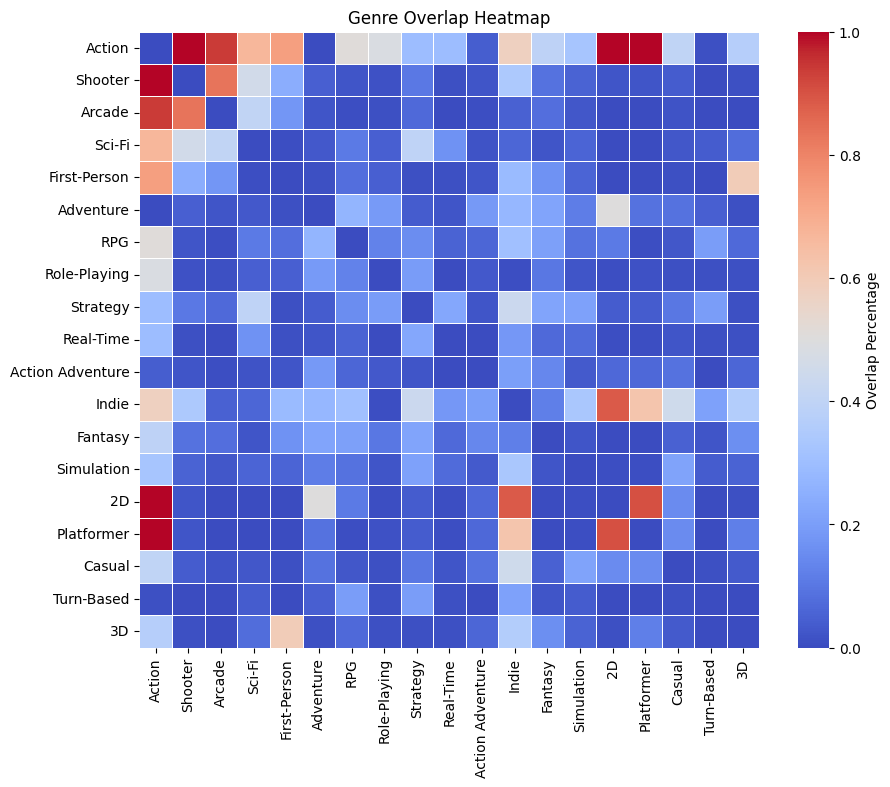

In [28]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 8))
sns.heatmap(overlap_matrix, cmap="coolwarm", vmin = 0, vmax = 1, cbar_kws={'label': 'Overlap Percentage'}, linewidths=0.5)
plt.title('Genre Overlap Heatmap')
plt.show()

### Removing Highly Overlapping Genres

Genre pairs with overlap above 0.8 are resolved by removing the less common of the two to reduce redundancy within the feature space while keeping the more representative genre

In [29]:
genres_to_remove = set()
threshold = 0.8
for genre1 in valid_genres:
    for genre2 in valid_genres:
        if genre1 != genre2 and overlap_matrix.loc[genre1, genre2] > threshold:
            
            if genre_counts[genre1] < genre_counts[genre2]:
                genres_to_remove.add(genre1)
            elif genre_counts[genre1] > genre_counts[genre2]:
                genres_to_remove.add(genre2)

valid_genres = [genre for genre in valid_genres if genre not in genres_to_remove]

print(f"Genres to remove based on overlap > {threshold}: {genres_to_remove}")
print(f"Updated valid genres:", valid_genres)

Genres to remove based on overlap > 0.8: {'2D', 'Platformer', 'Shooter', 'Arcade'}
Updated valid genres: ['Action', 'Sci-Fi', 'First-Person', 'Adventure', 'RPG', 'Role-Playing', 'Strategy', 'Real-Time', 'Action Adventure', 'Indie', 'Fantasy', 'Simulation', 'Casual', 'Turn-Based', '3D']


### Genre Counts After Filtering

In [30]:
all_filtered_genres = [genre for sublist in df_valid['Combined_Genres'].apply(lambda x: x.split(',')) for genre in sublist]
genre_counts_filtered = Counter(all_filtered_genres)
print(genre_counts_filtered)

Counter({'Indie': 954, 'Action': 922, 'Adventure': 767, 'Strategy': 494, 'RPG': 372, 'Simulation': 268, 'Action Adventure': 258, 'Shooter': 232, 'First-Person': 230, 'Role-Playing': 195, 'Arcade': 186, 'Casual': 183, 'Real-Time': 177, 'Sci-Fi': 161, '2D': 140, 'Platformer': 138, '3D': 116, 'Turn-Based': 111, 'Fantasy': 102, '': 1})


In [31]:
num_valid_genres = len(valid_genres)
print(f"Number of valid genres: {num_valid_genres}")

Number of valid genres: 15


## Final Cleanup

The original redundant genre columns and `estimated_owners` are dropped. Rows with no remaining genre label are removed. `user score` is scaled from 0-10 to 0-100 to match the critic score range.

In [32]:
df_valid = df_valid.drop(columns=['genre', 'genres', 'estimated_owners'])
df_valid = df_valid[df_valid['Combined_Genres'].str.strip() != '']
print(df_valid.shape[0])
df_valid['user score'] = df_valid['user score'] * 10

1715


In [33]:
df_valid.to_csv('../datasets/combined_filtered_genres.csv', index=False)